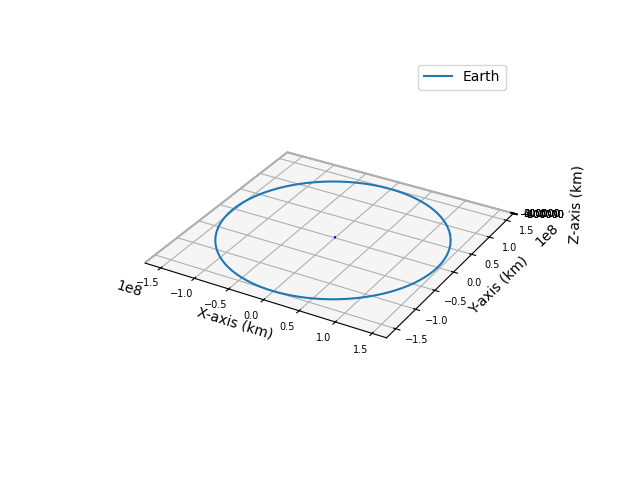

In [5]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from orbits import orbit

# TODO Could create a public python package with NASA's fact sheet data
mu = 132_712 * (10 ** 6)  # km^3/s^2
r = 695_700  # km


def plot_orbits(orbit_data):
    fig = plt.figure()
    ax = plt.axes(projection='3d', computed_zorder=False)

    for orbit in orbit_data:
        x, y, z = orbit.to_xyz()
        ax.plot(x, y, z, zorder=5, label=orbit.name)

    # Plot the body we're orbiting
    u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    ax.plot_wireframe(r * np.cos(u) * np.sin(v),
                      r * np.sin(u) * np.sin(v),
                      r * np.cos(v),
                      color="b", alpha=0.5, lw=0.5, zorder=0)

    ax.set_xlabel("X-axis (km)")
    ax.set_ylabel("Y-axis (km)")
    ax.set_zlabel("Z-axis (km)")
    ax.xaxis.set_tick_params(labelsize=7)
    ax.yaxis.set_tick_params(labelsize=7)
    ax.zaxis.set_tick_params(labelsize=7)
    ax.set_aspect('equal', adjustable='box')
    if len(orbit_data) // 2 < 5:
        ax.legend()
    else:
        fig.subplots_adjust(right=0.8)
        ax.legend(loc='center left', bbox_to_anchor=(1.07, 0.5), fontsize=7)
    ax.legend()
    plt.ion()
    plt.show()

orbits = []
orbits.append(orbit.Orbit(name="Earth", e=0.0167, a=149_598_000, i=0.0, RANN=0.0, omega=0.5719288))

plot_orbits(orbits)